# SSJ Observation Example

In [1]:
from LBH_to_eflux.observations.ssj import SSJDay
import datetime
import os
import numpy as np
from geospacepy.special_datetime import (doyarr2datetime,
                                        datetimearr2jd,
                                        datetime2jd,
                                        jd2datetime,
                                        datetime2doy,
                                        jdarr2datetime)

import matplotlib.pyplot as pp
from geospacepy.satplottools import draw_dialplot
from matplotlib.gridspec import GridSpec
from ssj_auroral_boundary.dmsp_spectrogram import dmsp_spectrogram
%matplotlib inline

In [2]:
dmsp = 16
hemisphere = 'S'
startdt = datetime.datetime(2014,2,18)
enddt = datetime.datetime(2014,2,18,2)

ssj_file = '/home/matsuo/Documents/tomokostuff/SSJcdfs_v2/20140218/dmsp-f16_ssj_precipitating-electrons-ions_20140218_v1.1.3_GLOWcond_v2.cdf'

Import a day of SSJ data from DMSP F16

In [3]:
ssj = SSJDay(16, 'N', ssj_file, read_spec = True )

/home/matsuo/amgeo_dev/LBH_to_eflux/LBH_to_eflux/observations/ssj.py:111: RuntimeWarning: invalid value encountered in less_equal
  self['ele_diff_energy_flux'][self['ele_diff_energy_flux'] <= 0 | ~np.isfinite(self['ele_diff_energy_flux']) ] = np.nan
/home/matsuo/amgeo_dev/LBH_to_eflux/LBH_to_eflux/observations/ssj.py:112: RuntimeWarning: invalid value encountered in less_equal
  self['ion_diff_energy_flux'][self['ion_diff_energy_flux'] <= 0 | ~np.isfinite(self['ion_diff_energy_flux']) ] = np.nan


Get the observations for the time fram efro the northern hemisphere

In [8]:
ssj_first_pass = ssj.get_ingest_data(startdt,enddt,'S')
ssj_first_pass.keys()

## Plot the spectrogram

(1387,)


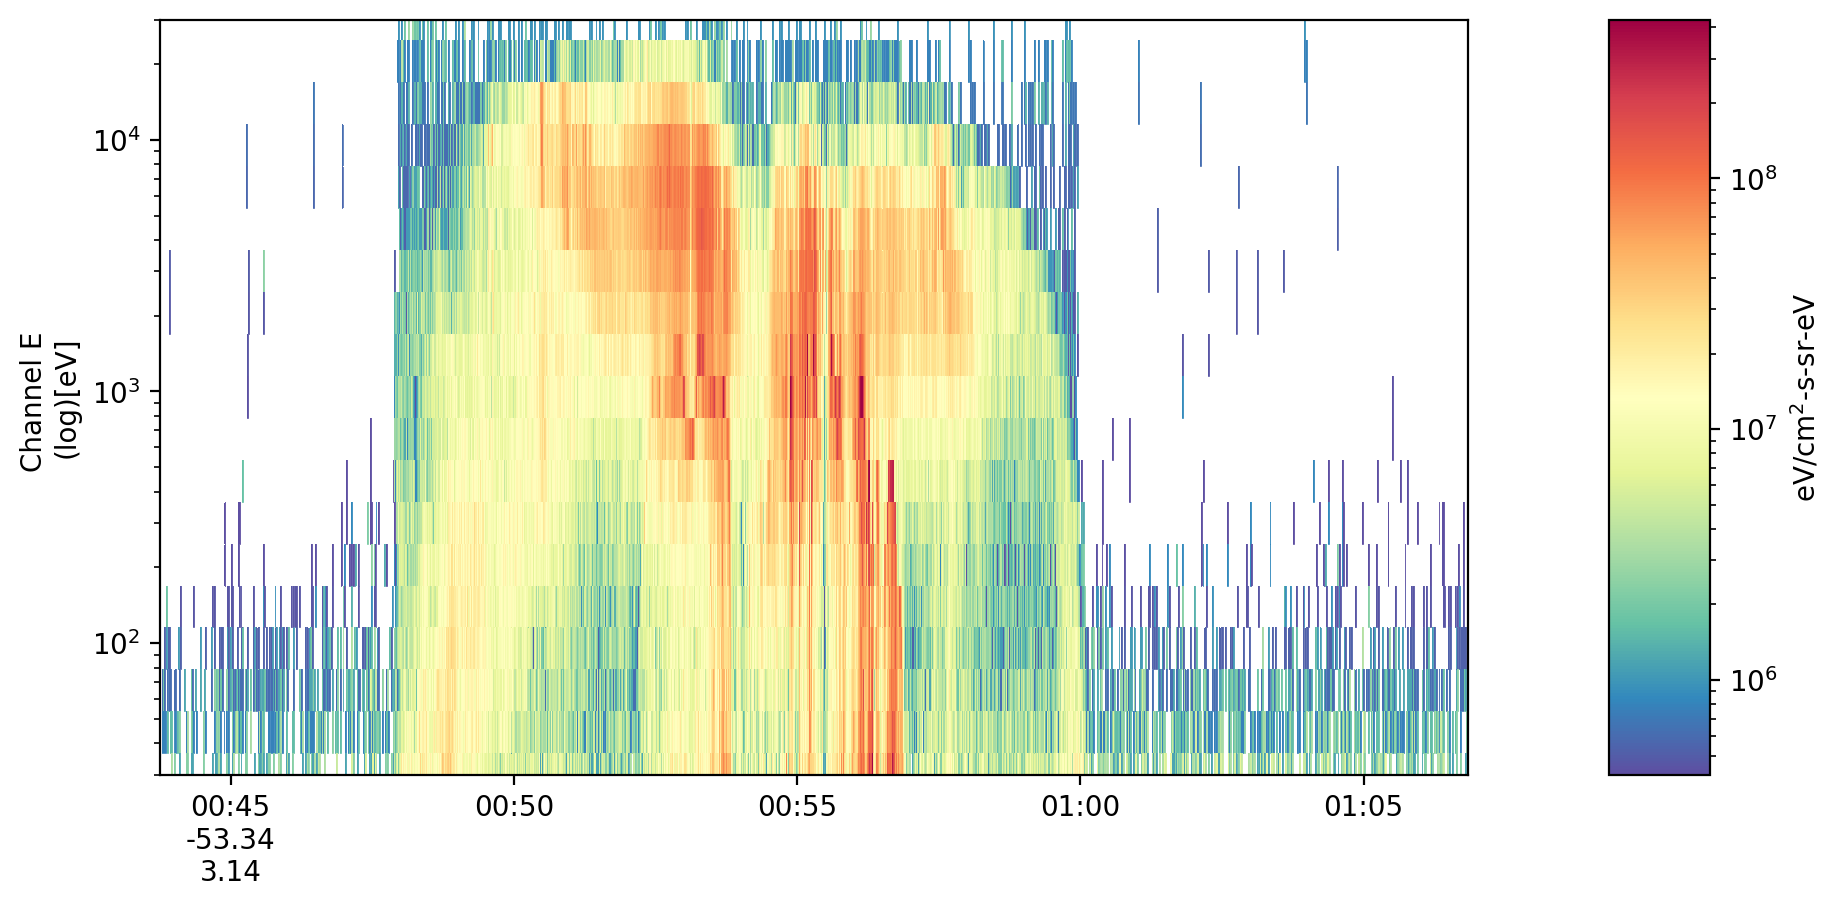

In [24]:
f1 = pp.figure(figsize=(10,10*0.5),dpi=200)
gs = GridSpec(1,13)
a2 = f1.add_subplot(gs[0:11])
a2_cb = f1.add_subplot(gs[12])
dmsp_spectrogram(jdarr2datetime(ssj_first_pass['jds']), ssj_first_pass['ele_diff_energy_flux'],\
                 ax = a2, ax_cb = a2_cb, \
                 lat = ssj_first_pass['lats'], lt = ssj_first_pass['lons']/15)